 #### Conditional Probability:
- P(A/B) = Probability of event A knowing that event B has already ocurred.
       P(queen/diamond) = 1/13
 
       P(A/B) = P(B/A)*P(A)/P(B)
   
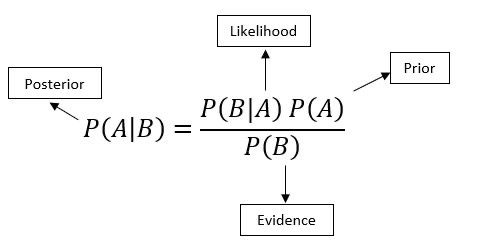
   
- P(queen/diamond) = P(diamond/queen)*P(queen)/P(diamond)
     - P(diamond/queen) = 1/4
     - P(queen) = 1/13
     - P(diamond) = 1/4
     - P(queen/diamond) = P(diamond/queen)*P(queen)/P(diamond)
         - P(queen/diamond) = (1/4)*(1/13)/(1/4)
         - P(queen/diamond) = 1/13

**Make a `naive` assumption that feautres such as male, class, cabin, fare etc. are independent of each other.**

- Naive bayes classifer is used in `email spam detection, hand written character detection, weather predcition, face detection, news article categorization`. 

- Diffent types of Naive Bayes Classifiers we use:

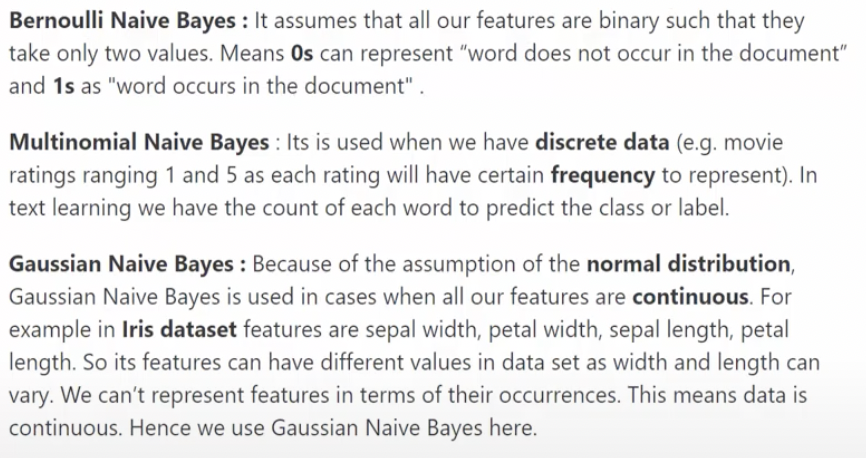

#### CountVectorizer

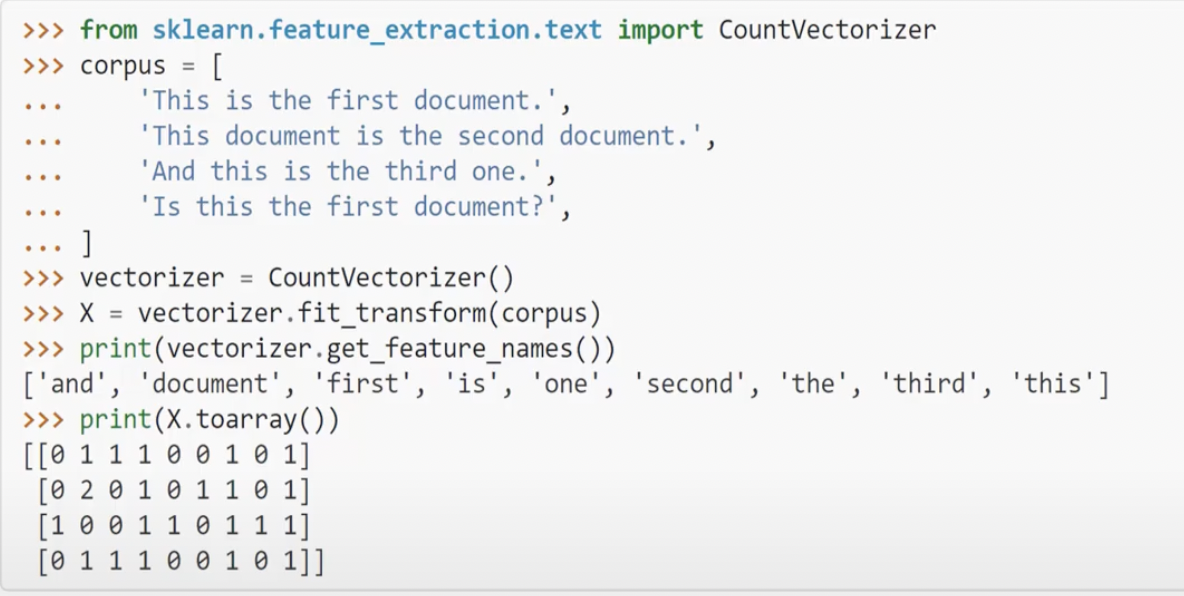

### Titanic Dataset

In [1]:
import pandas as pd
df = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/14_naive_bayes/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [2]:
df = df.drop(['PassengerId','Name', 'SibSp','Parch','Ticket','Cabin','Embarked'], axis = 'columns')

In [3]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [4]:
inputs = df.drop(['Survived'],axis = 'columns')
target = df.Survived

In [5]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [8]:
inputs = pd.concat([inputs,dummies],axis = 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [9]:
inputs = inputs.drop('Sex', axis = 'columns')
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [10]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [11]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [12]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [14]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.2)

In [16]:
len(X_train)

712

In [17]:
len(X_test)

179

In [18]:
X_train.head()

,Pclass,Age,Fare,female,male
400,3,39.0,7.9250,0,1
504,1,16.0,86.5000,1,0
523,1,44.0,57.9792,1,0
236,2,44.0,26.0000,0,1
248,1,37.0,52.5542,0,1


In [19]:
X_test.head()

,Pclass,Age,Fare,female,male
424,3,18.0,20.2125,0,1
576,2,34.0,13.0000,1,0
545,1,64.0,26.0000,0,1
595,3,36.0,24.1500,0,1
110,1,47.0,52.0000,0,1


#### GuassianNB method we are using right now

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [21]:
nb.score(X_test, Y_test)

0.7653631284916201

In [22]:
X_test[:10]

,Pclass,Age,Fare,female,male
424,3,18.000000,20.2125,0,1
576,2,34.000000,13.0000,1,0
545,1,64.000000,26.0000,0,1
595,3,36.000000,24.1500,0,1
110,1,47.000000,52.0000,0,1
648,3,29.699118,7.5500,0,1
398,2,23.000000,10.5000,0,1
10,3,4.000000,16.7000,1,0
862,1,48.000000,25.9292,1,0
436,3,21.000000,34.3750,1,0


In [23]:
Y_test[:10]

424    0
576    1
545    0
595    0
110    0
648    0
398    0
10     1
862    1
436    0
Name: Survived, dtype: int64

In [24]:
nb.predict(X_test[:10])

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [25]:
nb.predict_proba(X_test[:10])

array([[0.98792747, 0.01207253],
       [0.01508293, 0.98491707],
       [0.90770166, 0.09229834],
       [0.98897389, 0.01102611],
       [0.88289865, 0.11710135],
       [0.98903464, 0.01096536],
       [0.97547339, 0.02452661],
       [0.02363939, 0.97636061],
       [0.00413159, 0.99586841],
       [0.02622418, 0.97377582]])

### Email Spam Dataset

- ham -- correct email
- spam -- wrong email

In [26]:
import pandas as pd
es = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/14_naive_bayes/spam.csv")
es.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Exploration

In [27]:
es.groupby('Category').describe() 

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

#### Applying lambda function

In [28]:
es['spam'] = es['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [29]:
es.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(es.Message, es.spam, test_size=0.2)

In [31]:
len(X_train)

4457

In [32]:
len(X_test)

1115

#### CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
# v.get_feature_names()
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Multinomial Naive Bayes theorem

In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_count, Y_train)

MultinomialNB()

In [40]:
emails = [
    'Hey ram, can we go together to  watch a football match tomorrow?',
    'upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
# v.get_feature_names()
mnb.predict(emails_count)

array([0, 1])

In [42]:
X_test_count = v.transform(X_test)
mnb.score(X_test_count, Y_test)

0.9829596412556054

#### Pipeline Creation

- this will help us to not perform the `X_train_count & X_test_count steps` in CountVectorizer.

In [43]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [44]:
clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [45]:
clf.score(X_test, Y_test)

0.9829596412556054

In [46]:
clf.predict(emails)

array([0, 1])

#### Exercise 

- We are using Wine dataset

In [48]:
import pandas as pd
from sklearn.datasets import load_wine

In [49]:
win = load_wine()

In [54]:
win

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [50]:
dir(win)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [58]:
wd = pd.DataFrame(win.data, columns = win.feature_names)

In [53]:
wd.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [59]:
wd['target'] = win.target

In [60]:
wd

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [63]:
inputs = wd.drop("target", axis = 'columns')
target = wd.target

In [64]:
inputs.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [65]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [67]:
inputs.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [70]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.2)

In [73]:
len(X_train)

142

In [74]:
len(X_test)

36

#### GuassianNB & MultinomialNB

In [75]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB
nbg = GaussianNB()
nbg.fit(X_train, Y_train)

GaussianNB()

In [76]:
nbg.score(X_test, Y_test)

0.9722222222222222

In [87]:
X_test[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


In [83]:
Y_test[:5]

8      0
79     1
121    1
40     0
145    2
Name: target, dtype: int64

In [79]:
nbg.predict(X_test)

array([0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2])

#### MultinomialNB

In [85]:
nbm = MultinomialNB()
nbm.fit(X_train, Y_train)
nbm.score(X_test, Y_test)

0.8888888888888888

In [86]:
nbm.predict(X_test)

array([0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2])